In [6]:
import numpy as np
import pandas as pd
import random 

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,8)

In [10]:
df = pd.read_csv("../archivos/Metro_Interstate_Traffic_Volume.csv.gz", index_col=0).reset_index()

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.


1. Pregunta teórica: ¿Qué diferencia existe entre la covarianza y la correlación?


La covarianza indica si la dirección de las variables varían en la misma dirección, que puede ser positiva o negativa.

La correlación mide la fuerza con la las variabales a comparar están relacionadas. Los resultados máximos van de 1 a -1.  

___

2. Calculad la covarianza y la correlación de nuestro dataset. No nos vale solo con que la calculéis, debéis hacer una interpretación de los resultados obtenidos. Calculad solo la correlación de Pearson.


In [11]:
df.cov()

/tmp/ipykernel_557/1545644723.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov()


,temp,rain_1h,snow_1h,clouds_all,traffic_volume
temp,177.908431,5.417619,-0.002152,-53.068643,3.453076e+03
rain_1h,5.417619,2006.066438,-0.000033,8.419595,4.194713e+02
snow_1h,-0.002152,-0.000033,0.000067,0.008901,1.190211e-02
clouds_all,-53.068643,8.419595,0.008901,1522.228784,5.197932e+03
traffic_volume,3453.075605,419.471275,0.011902,5197.932363,3.947615e+06


In [12]:
df.corr()

/tmp/ipykernel_557/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,temp,rain_1h,snow_1h,clouds_all,traffic_volume
temp,1.000000,0.009069,-0.019755,-0.101976,0.130299
rain_1h,0.009069,1.000000,-0.000090,0.004818,0.004714
snow_1h,-0.019755,-0.000090,1.000000,0.027931,0.000733
clouds_all,-0.101976,0.004818,0.027931,1.000000,0.067054
traffic_volume,0.130299,0.004714,0.000733,0.067054,1.000000


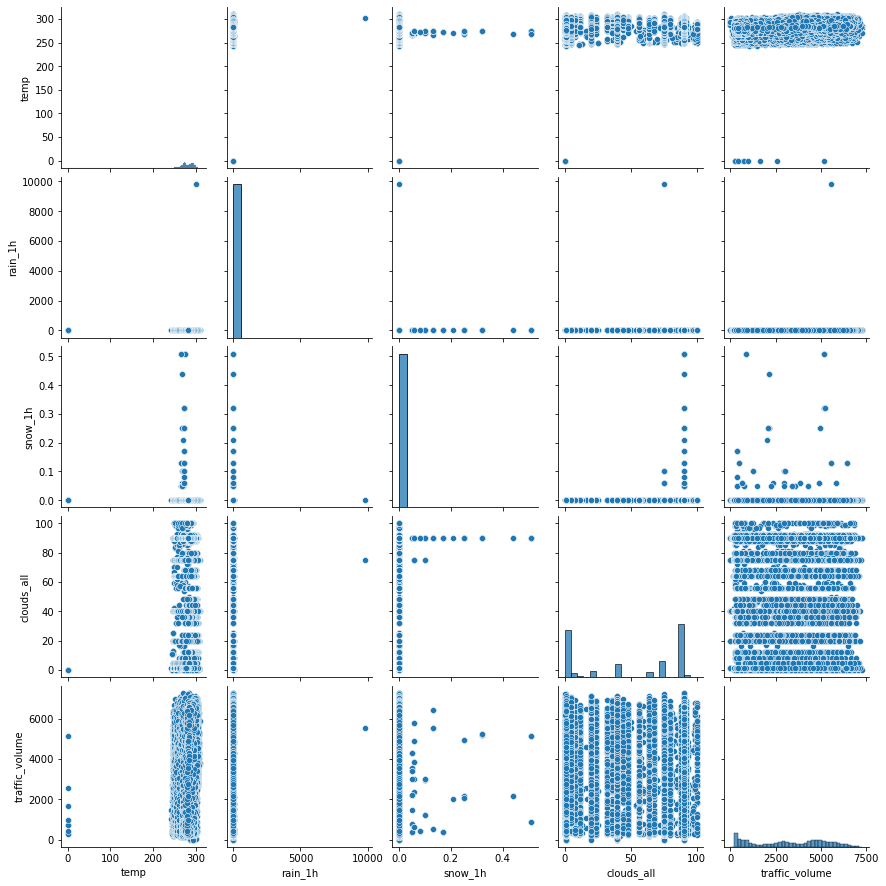

In [13]:
sns.pairplot(df)

La covarianza es mitad y mitad entre positiva y negativa y la fuerza de correlación entre las vars predictivas sigue siendo baja

Según los resultados vemos que en la covarianza de todas las variables predictoras con la variable respuesta es positiva, no obstante al mirar la correlación vemos que la fuerza con la que están relacionadas no es muy alta en general. 

Con el pairplot vemos relación aunque interpretamos que no es lineal y nos lleva a destacar la relación entre la variabale respuesta con las variables predictivas de "temp" y "clouds_all".

También vemos que en las variables predictivas  con la respuesta hay un patrón de tráfico en el metro independientemente del tiempo que haga, quizás necesitaríamos más variables?

Como vemos que no hay una correlación lineal entre nuestras variables vamos a probar hacer la correlación de Spearman, para que nos de unos datos más precisos.

In [17]:
df.corr(method="spearman")

/tmp/ipykernel_557/3994303778.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method="spearman")


,temp,rain_1h,snow_1h,clouds_all,traffic_volume
temp,1.000000,0.140119,-0.033354,-0.157011,0.132874
rain_1h,0.140119,1.000000,-0.001053,0.147382,0.004739
snow_1h,-0.033354,-0.001053,1.000000,0.036999,-0.005190
clouds_all,-0.157011,0.147382,0.036999,1.000000,0.056743
traffic_volume,0.132874,0.004739,-0.005190,0.056743,1.000000


In [14]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


___

3. Con los resultados de la correlación del ejercicio anterior, cread un heatmap.


In [20]:
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

/tmp/ipykernel_557/1424773859.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
/tmp/ipykernel_557/1424773859.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


/tmp/ipykernel_557/1938452118.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fig= sns.heatmap(df.corr(), cmap=sns.cubehelix_palette(as_cmap=True), mask= mask, annot=True)


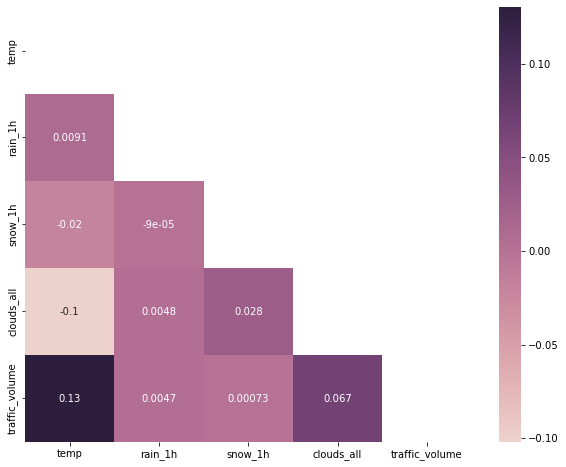

In [27]:
fig= sns.heatmap(df.corr(), cmap=sns.cubehelix_palette(as_cmap=True), mask= mask, annot=True)
plt.savefig("../graficas/heatmap_df_metro.png");

___

4. Guardad la gráfica del heatmap.

In [26]:
#plt.savefig("../graficas/heatmap_df_metro.png")
#La hemos guardado arriba pero copiamos el código aquí, por orden visual.

<Figure size 720x576 with 0 Axes>